# Assignment Netwerkanalyse

## Notebook made by

**Gebruik graag dit formaat**

* Voor de namen:  voornaam rest van je naam, voornaam rest van je naam,....
* je studentnummers: hetzelfde: scheidt met `,`
* je emails: hetzelfde: scheidt met `,`
* voor je groep: alleen de hoofdletter (dus voor de groep van Marx zou je `A` kiezen)

__Namen__:Anoniem
__Emails__:Anoniem
__Student id__:Anoniem
__Groep__:Anoniem

## Toelichting

* De meeste opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. Dit zijn dus *NIET* alle tests, die komen er bij het graden nog bij.
* Elke vraag is 1 punt waard, tenzij anders aangegeven. Soms is die punt onderverdeeld in deelpunten, maar niet altijd. 

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Dit levert problemen op bij nakijken. Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

## Na het inleveren!

* Het gebeurt erg vaak dat mensen een "leeg bestand" inleveren. Vaak een andere versie van de opgave die nog ergens op je computer rondslingerde. Zonde van al je werk toch!
* Dus, lever **minstens een half uur voor tijd in**. Download dan wat je hebt ingeleverd op Canvas. Geef het een andere naam om verwarring te voorkomen. En draai alle cellen, en bekijk het. Geen syntax fouten? Alle vragen gemaakt? Dan zit het vast wel goed, en hoef je niet in de zenuwen te zitten.

# Week 3
* Alle vragen zijn één punt waard

In [1]:
%matplotlib inline
import networkx as nx
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from nose.tools import assert_equal, assert_count_equal

# Deel 1: First Course Chap 2

* Maak vragen 1-40

### Ook met programmeren

* Check je antwoorden op vragen 8-11 door het gerichte netwerk te programmeren, en alle vragen ook te programmeren in Networkx.
* Zet de netwerken in Fig 2-13 en 2.14 in Networkx, probeer ze ook zo mooi uit te printen (zie assignment week 2), en check je antwoorden op de vragen erover.
* Als je het leuk vindt kan je dit ook met de andere voorbeelden doen. Je weet dan wel zeker dat je het goed hebt.
    * Op het tentamen mag je ook programmeren.....


# First Course Chap 2 antwoorden
2. True
3. False
4. A connected network needs a minimum of N nodes. An unconnected network can have as few as 0 nodes (although would that still really be a network?)
5. True
6. True
7. True
8. There are cycles. (E to F, F to E for example) It is not strongly connected, but it is weakly connected.
9. It is not a tree.
10. Diameter is 2.
11. Yes, the resulting network will be connected. This is because the definition of weakly connected is literally that a network is connected when ignoring directions.
12. C. it has increased or stayed the same.
13. B. Weakly connected.
14. In-strength node D: 11. Out-strength node C: 3.
15. One node.
16. B. Weakly connected
17. The shortest path between 1 and 6 is 1 -> 2 -> 4 -> 6, with a length of 2.0.
18. The shortest path will become 1 -> 3 -> 5 -> 6.
19. C. 10.
20. A. 0.05
21. No.
22. A. Strongly connected.
23. Diameter is 3.
24. Diameter is 2.
25. False
26. C.
27. True
28. D.   
\32. Max. = 1.

\33. Max = 0.

\34. 0.15.

\40. A, C, D.

Question 8:
Network contains cycles: True
Network is strongly connected: False
Network is weakly connected: True

Question 9:
Network is tree: False

Question 10:
Network diameter: 2

Question 11:
The weakly connected network is converted to undirected network, zo Q11: True


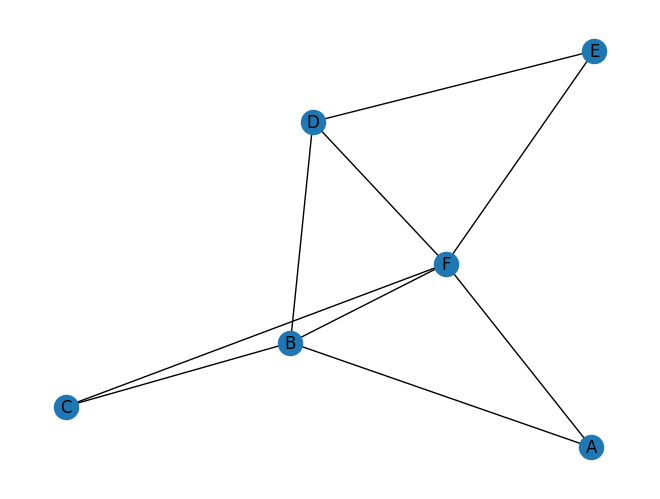

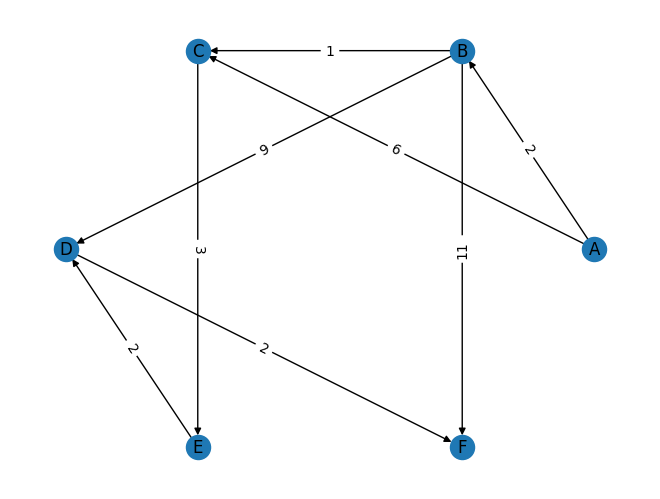

In [2]:
from string import ascii_uppercase
from string import ascii_uppercase
n = [ascii_uppercase[i] for i in range(6)]
q21 = nx.DiGraph()
q21.add_nodes_from(n)
q21.add_edges_from([('A', 'B'), ('B', 'C'), ('D', 'E'), ('D', 'B'), ('E', 'F')])
add_f = [('F', n[j]) for j in range(5)]
q21.add_edges_from(add_f)

q21nodir = nx.Graph()
q21nodir.add_nodes_from(n)
q21nodir.add_edges_from([('A', 'B'), ('B', 'C'), ('D', 'E'), ('D', 'B'), ('E', 'F')])
q21nodir.add_edges_from(add_f)

print("Question 8:")
print(f"Network contains cycles: {bool(nx.find_cycle(q21))}")
print(f"Network is strongly connected: {nx.is_strongly_connected(q21)}")
print(f"Network is weakly connected: {nx.is_weakly_connected(q21)}")

print("\nQuestion 9:")
print(f"Network is tree: {nx.is_tree(q21nodir)}")

print("\nQuestion 10:")
print(f"Network diameter: {nx.diameter(q21nodir)}")

print("\nQuestion 11:")
print(f"The weakly connected network is converted to undirected network, zo Q11: {nx.is_connected(q21nodir)}")

plt.figure(1)
nx.draw(q21nodir, with_labels=True)

plt.figure(2)
Fig213 = nx.DiGraph()
Fig213.add_nodes_from(n)
Fig213.add_weighted_edges_from([('A', 'B', 2), ('A', 'C', 6), ('B', 'C', 1), ('B', 'D', 9), ('B', 'F', 11), 
                               ('C', 'E', 3), ('D', 'F', 2), ('E', 'D', 2)])

pos = nx.circular_layout(Fig213)
nx.draw(Fig213, pos, with_labels=True)

my_edge_labels = {(u,v,): d['weight']
                   for u, v, d in Fig213.edges(data=True)
                 }

nx.draw_networkx_edge_labels(Fig213, pos, edge_labels=my_edge_labels);

# Deel 2: Easley & Kleinberg Chapter 13

De volgende vragen hebben betrekking op [hoofdstuk 13 van Easley and Kleinberg](http://www.cs.cornell.edu/home/kleinber/networks-book/networks-book-ch13.pdf). Hieronder staat de networkx graaf gebaseerd op figuur 13.8, pas deze vooral aan om te zorgen dat je functies altijd werken.

In [3]:
nx.__version__

'3.2.1'

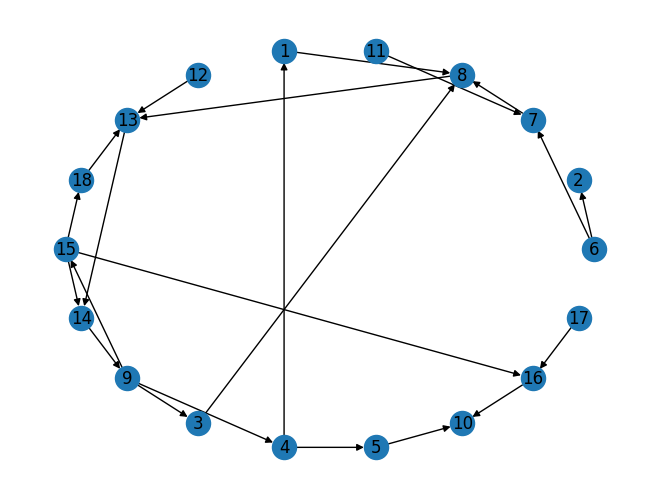

In [4]:
EK = nx.DiGraph()
EK.add_edges_from([(6, 2), (6, 7), (7, 8), (11, 7), (1, 8), (12, 13), (8, 13),
                   (18, 13), (15, 18), (15, 14), (13, 14), (14, 9), (9, 3),
                   (3, 8), (4, 1), (4, 5), (5, 10), (16, 10), (17, 16), (15,
                                                                         16),
                   (9, 4), (9, 15)])

#pos = nx.circular_layout(EK)
#nx.draw_networkx(EK, pos=pos, with_labels=True)
nx.draw_circular(EK, with_labels=True)

## Vraag 5

* Maak een functie `find_SCC` die gegeven een gerichte graaf een set teruggeeft met daarin alle nodes die behoren tot de grootste SCC (strongly connected component).

* Maak een functie `find_IN` die gegeven een gerichte graaf een set teruggeeft met daarin alle nodes die behoren tot de IN (dat zijn alle knopen met een pad naar de SCC, maar vanuit de SCC kan je niet naar die knopen komen).

* Maak een functie `find_OUT` die gegeven een gerichte graaf een set teruggeeft met daarin alle nodes die behoren tot de OUT (ja, dit snap je nu zelf wel hoop ik).

In [5]:
def find_SCC(G):
    #WRITE YOUR CODE HERE
    return max(nx.strongly_connected_components(G), key=len)


def find_IN(G):
    #WRITE YOUR CODE HERE
    return {node for node in G if node not in find_SCC(G) and any(nx.has_path(G, node, target_node) for target_node in find_SCC(G))}


def find_OUT(G):
    #WRITE YOUR CODE HERE
    return {node for node in G if any(nx.has_path(G, target_node, node) for target_node in find_SCC(G)) and not any(nx.has_path(G, node, target_node) for target_node in find_SCC(G))}
    
# even testen op figuur 13.8 uit het boek
find_SCC(EK), find_IN(EK), find_OUT(EK)

({1, 3, 4, 8, 9, 13, 14, 15, 18}, {6, 7, 11, 12}, {5, 10, 16})

In [6]:
assert_equal(type(find_SCC(EK)), set)
assert_equal(type(find_OUT(EK)), set)
assert_equal(type(find_IN(EK)), set)
assert find_SCC(EK).issubset(EK.nodes())
assert find_IN(EK).issubset(EK.nodes())
assert find_OUT(EK).issubset(EK.nodes())

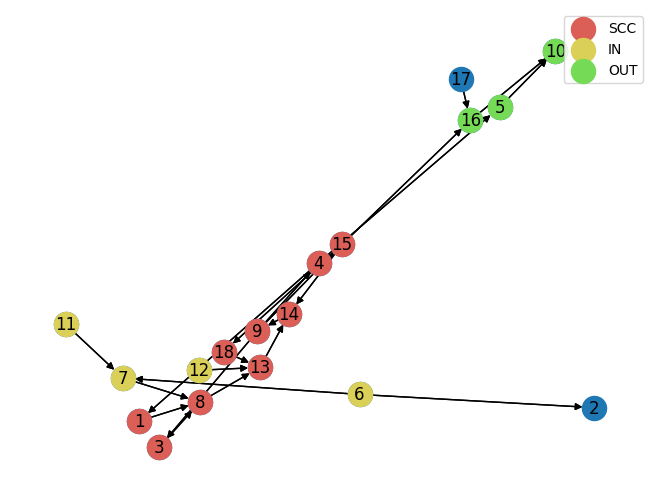

In [7]:
# resultaat graaf tekenen
def draw_web(G):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True)
    color = sns.color_palette("hls", 7)
    #tubes = find_tubes(G)
    legenda = [
        'SCC', 'IN', 'OUT', ] #'Tendrils (IN)', 'Tendrils (OUT)', 'Tubes','Disconnected' ]
    listofnodes = [
        find_SCC(G),
        find_IN(G),
        find_OUT(G),
        #find_tendrils_IN(G) - tubes,
        #find_tendrils_OUT(G) - tubes, tubes,
        #find_disconnected(G)
    ]
    for n, (label, nodes, c) in enumerate(zip(legenda, listofnodes, color)):
        nx.draw_networkx_nodes(
            G, pos, nodelist=nodes, node_color=[c], label=label)
    nx.draw_networkx_edges(G, pos)
    plt.legend()
    plt.axis('off')
    plt.show()


draw_web(EK)

# Deel 3: Clustering coëfficiënt

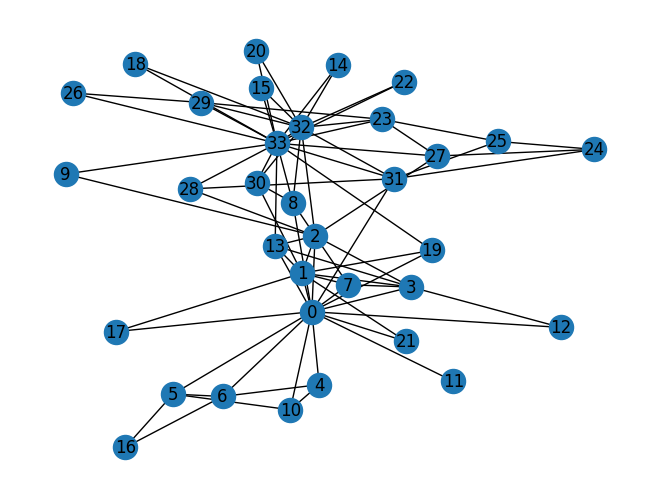

In [8]:
G = nx.karate_club_graph()

nx.draw(G, with_labels=True)

## Vraag 3.1
Maak een functie `clusteringcoefficient(G)` die een graaf accepteert als input, en voor alle knopen de clusteringcoëfficiënt ([Sectie 3.1 E&amp;K](http://www.cs.cornell.edu/home/kleinber/networks-book/networks-book-ch03.pdf)) berekent.
                
<strong>Bereken dit zelf, gebruik geen NetworkX functie die dit al doet zoals `clustering` en `average_clustering`. </strong> Je mag natuurlijk wel NetworkX handigheidjes als `G.neighbors(v)` gebruiken.

Als output krijg je een dict  met de knopen van `G` als sleutels en de clustering coeffiecient van die knoop als bijbehorende waarde.   Geef waarde 0 als een knoop degree 1 heeft.


De verwachte output voor deze graaf is 1 voor knoop 7 en 2/3 voor knoop 3 en 0 voor knoop 11. etc. 
  

{0: 0.15,
 1: 0.3333333333333333,
 2: 0.24444444444444444,
 3: 0.6666666666666666,
 4: 0.6666666666666666,
 5: 0.5,
 6: 0.5,
 7: 1.0,
 8: 0.5,
 9: 0.0,
 10: 0.6666666666666666,
 11: 0.0,
 12: 1.0,
 13: 0.6,
 14: 1.0,
 15: 1.0,
 16: 1.0,
 17: 1.0,
 18: 1.0,
 19: 0.3333333333333333,
 20: 1.0,
 21: 1.0,
 22: 1.0,
 23: 0.4,
 24: 0.3333333333333333,
 25: 0.3333333333333333,
 26: 1.0,
 27: 0.16666666666666666,
 28: 0.3333333333333333,
 29: 0.6666666666666666,
 30: 0.5,
 31: 0.2,
 32: 0.19696969696969696,
 33: 0.11029411764705882}

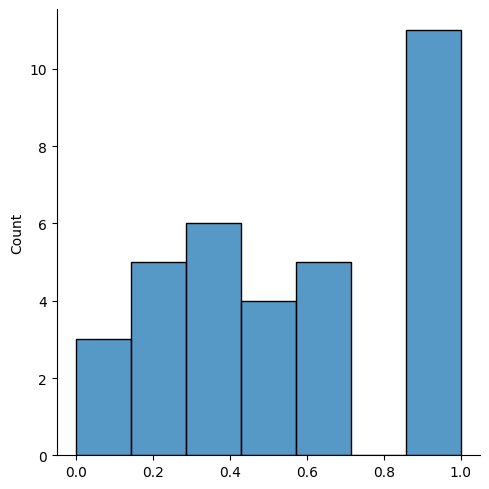

In [9]:
#WRITE YOUR CODE HERE

def clusteringcoefficient(G):
#WRITE YOUR CODE HERE
    coefficient = {node: float(0) if G.degree(node) == 1 else nx.number_of_edges(G.subgraph(list(G.neighbors(node)))) / ((G.degree(node) * (G.degree(node) - 1)) / 2) for node in G}                                        
    return coefficient

# even een mooi plotje van de distributie van de CCs maken
A= pd.Series( clusteringcoefficient(G) )
sns.displot(A)

clusteringcoefficient(G)

In [10]:
assert isinstance(clusteringcoefficient(G), dict)
for n in clusteringcoefficient(G):
    assert n in G
    assert isinstance(clusteringcoefficient(G)[n],float)

## Vraag 3.1.1

Maak de functie `cc_nice(G, v)` nu nog een keer maar gebruik nu alleen maar `G.has_edge()` van networkx.
Chack dat hij echt hetzelfde doet als je eerdere functie en als networkx clustering.

In [11]:
#WRITE YOUR CODE HERE
def cc_nice(G, v):
    v_neighbors = []
    clusters = 0
    for node in G:
        if G.has_edge(v, node):
            v_neighbors.append(node)
    num_neighbors = len(v_neighbors)
    if num_neighbors < 2:
        return 0
    for neighbor1 in v_neighbors:
        for neighbor2 in v_neighbors:
            if G.has_edge(neighbor1, neighbor2):
                clusters += 1
    return (clusters) / (num_neighbors * (num_neighbors - 1))
                    
# check dat de twee functies hetzelfde resultaat geven voor elke knoop op de karateclub
clusteringcoefficient(G)== {n:cc_nice(G,n) for n in G}

True

## Vraag 3.1.2

Maak de functie `cc_nicer(G, v)` nu nog een keer maar gebruik nu alleen maar  `G.subgraph` en `nx.density` van networkx.
Check dat hij echt hetzelfde doet als je eerdere functie en als networkx clustering.

In [12]:
#WRITE YOUR CODE HERE 
def cc_nicer(G, v):
    return nx.density(G.subgraph(G[v]))


# check dat de twee functies hetzelfde resultaat geven voor elke knoop op de karateclub
clusteringcoefficient(G)== {n:cc_nicer(G,n) for n in G}

True

## Vraag 3.2

2. Maak de functie  `is_complete(G)`  die `True` teruggeeft precies dan als het ongerichte netwerk  `G` een volledig netwerk is en `False` als dat niet het geval is.  Gebruik **alleen** de networkx functies `nx.number_of_nodes(G)` en `G.number_of_edges()`.

In [13]:
def is_complete(G):
    #WRITE YOUR CODE HERE
    return (G.number_of_edges() / (nx.number_of_nodes(G) * (nx.number_of_nodes(G) - 1))) == 1
    
is_complete(G)

False

In [14]:
assert isinstance(is_complete(G), bool)